#Libraries

In [1]:
import pandas as pd
import os, sys, time, random
import numpy as np
from scipy import stats
sys.path.append('../')
from RASLseqTools import *
sys.path.append('../RASLseqTools')
import RASLseqAnalysis_STAR

In [2]:
import seaborn
%pylab inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


###NOTE: THIS SAMPLE NOTEBOOK REQUIRES THE FOLLOWING DEPENDENCIES:
<p>STAR BINARY: https://github.com/alexdobin/STAR/tree/master/bin</p>
<p>python-Levenshtein: https://pypi.python.org/pypi/python-Levenshtein/</p>
<p>pandas: https://github.com/pydata/pandas</p>
<p>seaborn: https://github.com/mwaskom/seaborn</p>
<p>NumPy: http://www.numpy.org</p>
<p>SciPy: http://www.scipy.org</p>

#Data

In [3]:
fastq_path = '../data/sample.fastq.gz'

probes = '../data/sample.probes'

well_annot = '../data/sample.bc'

aligner_path = '../STAR_bin/'

#Analysis

##RASLseqAnalysis_STAR

In [4]:
#Initiate RASLseqAnalysis
seqRun1 = RASLseqAnalysis_STAR.RASLseqAnalysis_STAR(fastq_path, probes, aligner_path, well_annot, '../data/temp/', write_file='../data/temp/test_alignment.txt' ,print_on=False, \
                 n_jobs=1, offset_5p=25, offset_3p=21, wellbc_start=0, wellbc_end=8, write_alignments=False )

In [5]:
#Well Annotation DataFrame
seqRun1.RASLseqBCannot_obj.well_annot_df

,,Concentration
PlateBarcode,WellBarcode,
CATATTG,GACTGACT,0.1
GAGATTC,ATCGATCG,0.1
GAGCATG,CTAGCTAG,0.1
TGATAGT,AGCTCAGA,0.1


In [6]:
#Probe DataFrame
seqRun1.RASLseqProbes_obj.on_off_target_probes_df.head()

,acceptor_probe_id,donor_probe_id,probe_seq,AcceptorAdaptorSequence,DonorAdaptorSequence
NM_000569.6_FCGR3A_2014///NM_000569.6_FCGR3A_2014,NM_000569.6_FCGR3A_2014,NM_000569.6_FCGR3A_2014,CAATGAACAAAGCTACACAGGAATTAGATATTGAAGCAGA,GGAAGCCTTGGCTTTTG,AGATCGGAAGAGCACAC
NM_000569.6_FCGR3A_2014///NM_000569.6_FCGR3A_2119,NM_000569.6_FCGR3A_2014,NM_000569.6_FCGR3A_2119,CAATGAACAAAGCTACACAGGAAGGATTTGAAAGTTTCAT,GGAAGCCTTGGCTTTTG,AGATCGGAAGAGCACAC
NM_000569.6_FCGR3A_2014///NM_000572.2_IL10_1007,NM_000569.6_FCGR3A_2014,NM_000572.2_IL10_1007,CAATGAACAAAGCTACACAGGAGGGAGGTCAGGGAAAACA,GGAAGCCTTGGCTTTTG,AGATCGGAAGAGCACAC
NM_000569.6_FCGR3A_2014///NM_000572.2_IL10_787,NM_000569.6_FCGR3A_2014,NM_000572.2_IL10_787,CAATGAACAAAGCTACACAGTAAATCGTTCACAGAGAAGC,GGAAGCCTTGGCTTTTG,AGATCGGAAGAGCACAC
NM_000569.6_FCGR3A_2014///NM_000594.3_TNF_1327,NM_000569.6_FCGR3A_2014,NM_000594.3_TNF_1327,CAATGAACAAAGCTACACAGACATAAATAGAGGGAGCTGG,GGAAGCCTTGGCTTTTG,AGATCGGAAGAGCACAC


#Demultiplexing and Aligning FASTQ Reads

In [7]:
#FASTQ Analysis
%time seqRun1.get_target_counts_df()



Starting Asynchronous Alignment Process
Demultiplexing Reads
Demultiplexing Complete
Alignment Complete
250000 Reads Processed
CPU times: user 2.14 s, sys: 411 ms, total: 2.55 s
Wall time: 7.91 s


In [8]:
#RESULTS
#Test data with approximately balanced read counts for each on-target probe
seqRun1.RASLseqAnalysis_df

Concentration  \
PlateBarcode WellBarcode                  
CATATTG      AGCTCAGA               NaN   
             ATCGATCG               NaN   
             CTAGCTAG               NaN   
             GACTGACT               0.1   
GAGATTC      AGCTCAGA               NaN   
             ATCGATCG               0.1   
             CTAGCTAG               NaN   
             GACTGACT               NaN   
GAGCATG      AGCTCAGA               NaN   
             ATCGATCG               NaN   
             CTAGCTAG               0.1   
             GACTGACT               NaN   
TGATAGT      AGCTCAGA               0.1   
             ATCGATCG               NaN   
             CTAGCTAG               NaN   
             GACTGACT               NaN   

                          NM_000569.6_FCGR3A_2014///NM_000569.6_FCGR3A_2014  \
PlateBarcode WellBarcode                                                      
CATATTG      AGCTCAGA                                                   633   
             ATCGATCG                                                   600   
             CTAGCTAG                                                   635   
             GACTGACT                                                   595   
GAGATTC      AGCTCAGA                                                   622   
             ATCGATCG                                                   638   
             CTAGCTAG                                                   615   
             GACTGACT                                                   616   
GAGCATG      AGCTCAGA                                                   657   
             ATCGATCG                                                   617   
             CTAGCTAG                                                   618   
             GACTGACT                                                   664   
TGATAGT      AGCTCAGA                                                   616   
             ATCGATCG                                                   605   
             CTAGCTAG                                                   631   
             GACTGACT                                                   608   

                          NM_000569.6_FCGR3A_2119///NM_000569.6_FCGR3A_2119  \
PlateBarcode WellBarcode                                                      
CATATTG      AGCTCAGA                                                   619   
             ATCGATCG                                                   589   
             CTAGCTAG                                                   606   
             GACTGACT                                                   569   
GAGATTC      AGCTCAGA                                                   640   
             ATCGATCG                                                   630   
             CTAGCTAG                                                   629   
             GACTGACT                                                   633   
GAGCATG      AGCTCAGA                                                   602   
             ATCGATCG                                                   635   
             CTAGCTAG                                                   587   
             GACTGACT                                                   632   
TGATAGT      AGCTCAGA                                                   650   
             ATCGATCG                                                   624   
             CTAGCTAG                                                   601   
             GACTGACT                                                   612   

                          NM_000572.2_IL10_1007///NM_000572.2_IL10_1007  \
PlateBarcode WellBarcode                                                  
CATATTG      AGCTCAGA                                               596   
             ATCGATCG                                               606   
             CTAGCTAG                                               599   
             GACTGACT         

##SUMMARY REPORT

In [9]:
#Pandas DataFrame of Probe Counts
seqRun1_counts = seqRun1.RASLseqAnalysis_df[seqRun1.probe_columns].fillna(value=0)
seqRun1_counts['well_count'] = seqRun1_counts.apply(np.sum, axis=1)  #total read counts by well

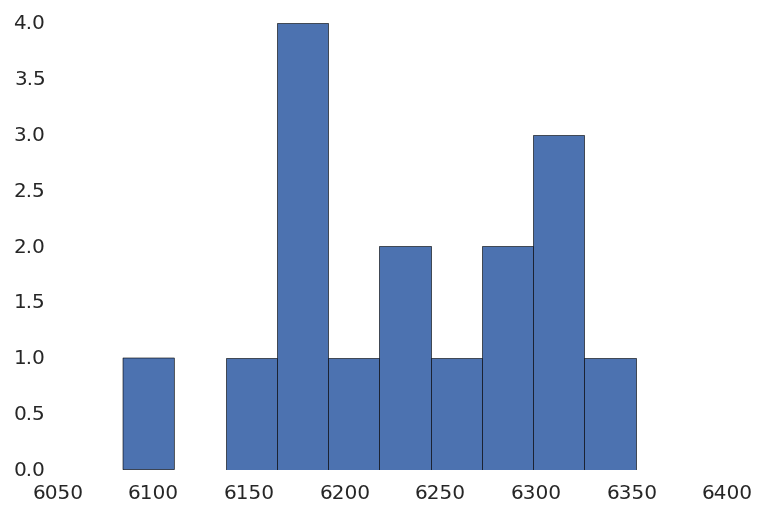

In [10]:
#READS BY WELL
seqRun1_counts.well_count.hist(bins=10)

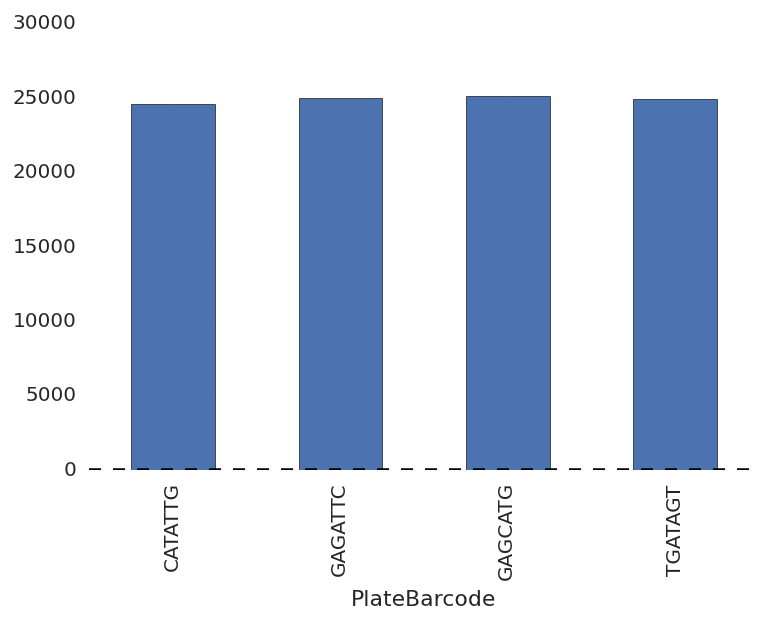

In [11]:
#READS BY PLATE
seqRun1_counts.groupby(level=0)['well_count'].aggregate(np.sum).plot(kind='bar')

In [12]:
#ADDING ROW AND COL ANNOTATIONS
seqRun1_counts.insert(0,'Row', [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4])
seqRun1_counts.insert(1,'Col', [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4])

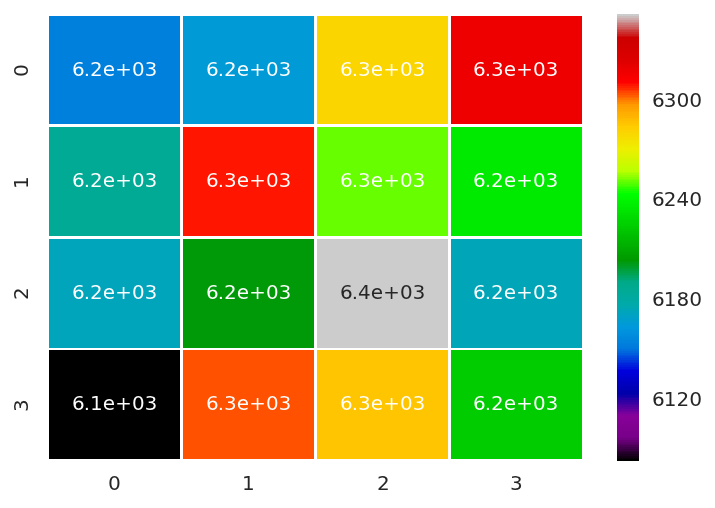

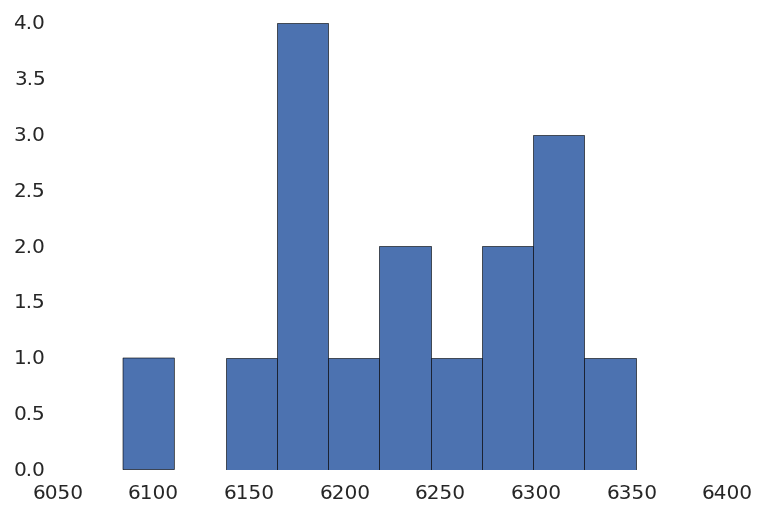

In [13]:
#MEDIAN READ COUNT BY WELL

median_well_count = seqRun1_counts.pivot_table(index='Row', columns='Col', values='well_count', aggfunc=np.median)
seaborn.heatmap(median_well_count.values, \
                cmap='spectral', square=False, annot=True)   
plt.show()
plt.close()
median_well_count.stack().hist(bins=10)

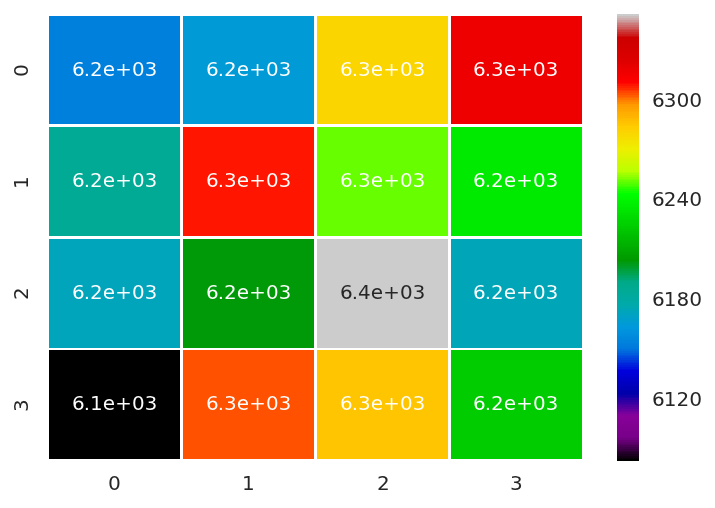

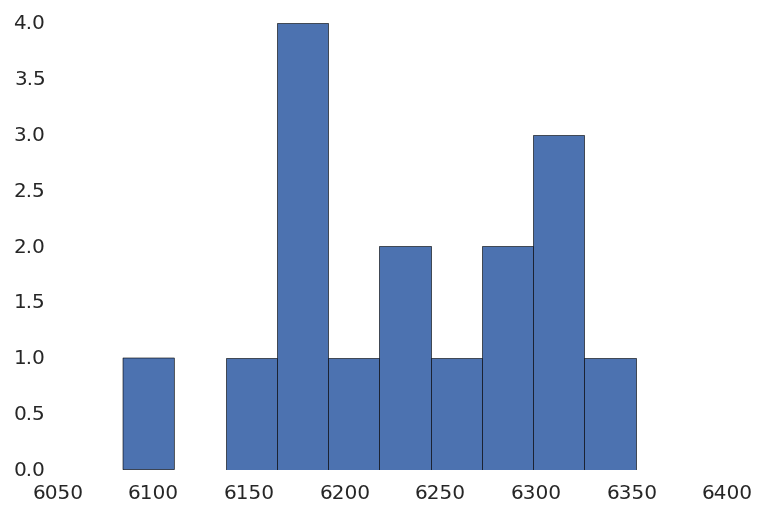

In [14]:
#MEAN WELL READ COUNT

mean_well_count = seqRun1_counts.pivot_table(index='Row', columns='Col', values='well_count', aggfunc=np.mean)
seaborn.heatmap(mean_well_count.values, \
                cmap='spectral', square=False, annot=True)   
plt.show()
plt.close()
mean_well_count.stack().hist(bins=10)

explained variance ratio (first two components): [ 0.23542144  0.17425137]


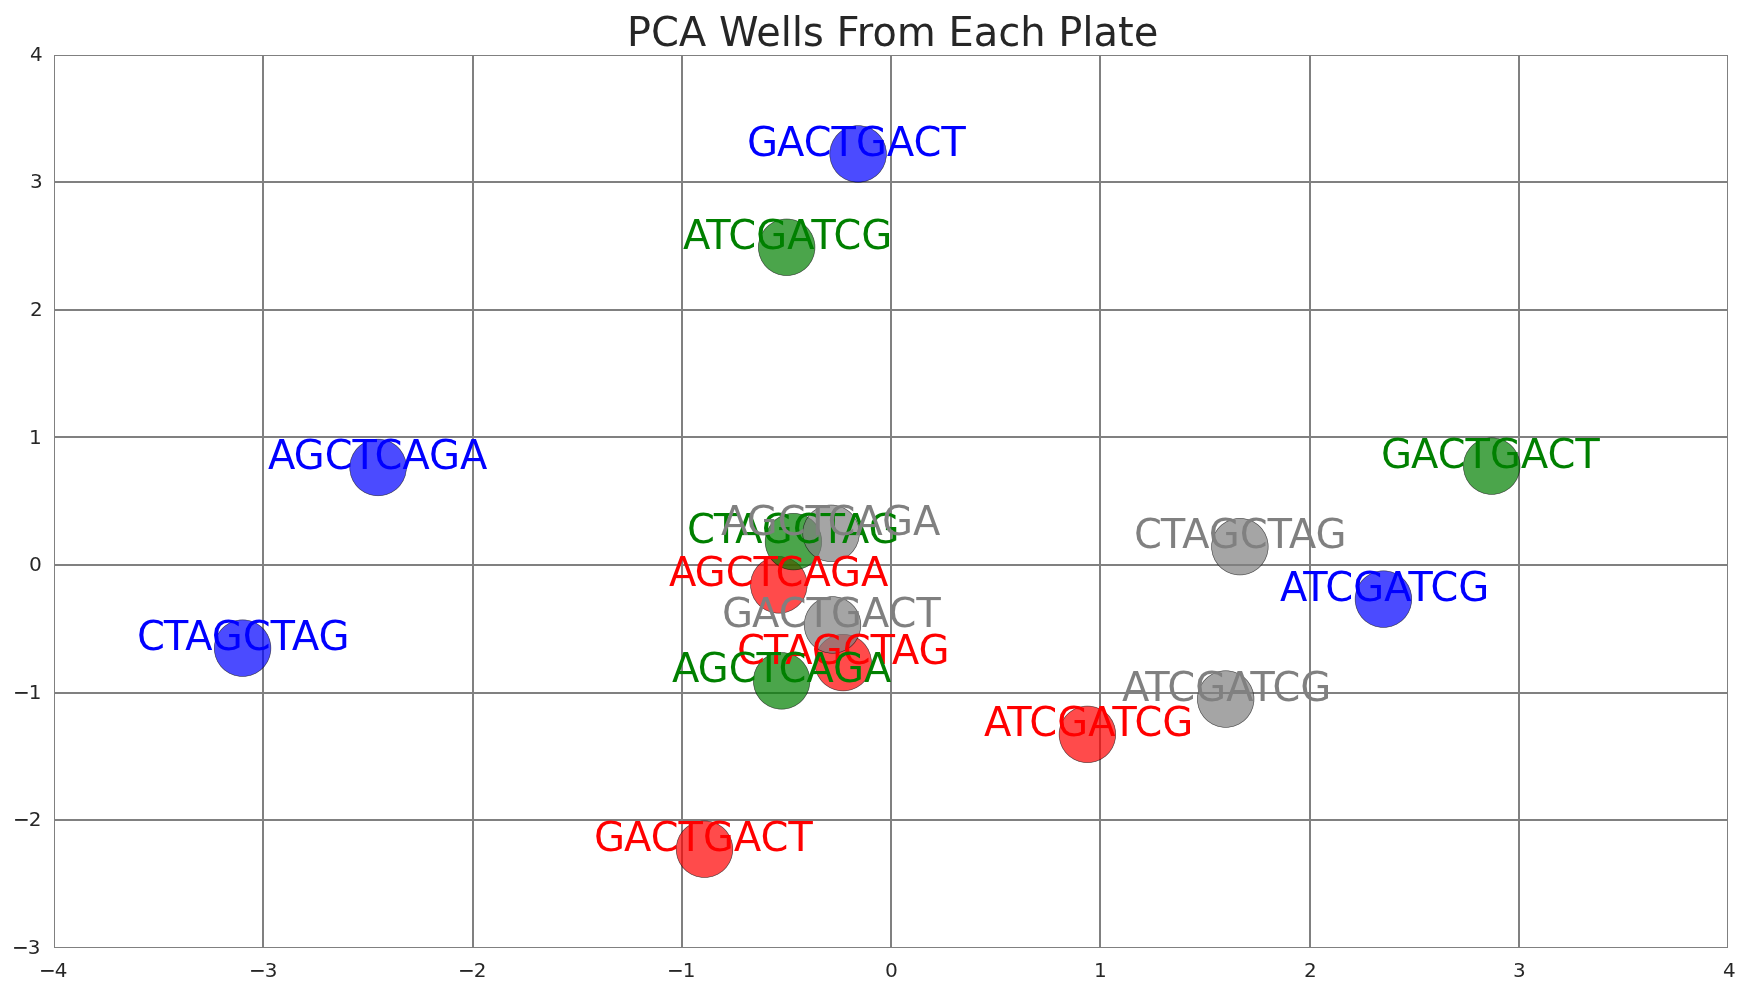

In [16]:
#PCA FOR EACH WELL BY PLATE

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.lda import LDA
from sklearn.preprocessing import StandardScaler



X = seqRun1_counts[seqRun1.probe_columns]
target_names = seqRun1_counts.index.get_level_values(1).tolist()


X = StandardScaler().fit_transform(X)
y = target_names
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))



fig, ax = plt.subplots(figsize=(15,8))

#colored according to plate
colors = ['r', 'r', 'r', 'r', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'gray', 'gray', 'gray', 'gray', ]

ax.scatter(X_r[0:,0], X_r[0:,1], s=800, alpha=0.7, c=colors, cmap=cm.spectral)
for i, txt, c in zip(X_r, target_names, colors):
    
    ax.annotate(txt, xy=(i[0],i[1]), textcoords='offset points', va='bottom', ha='center', xytext=(0, -5), fontsize=20, color=c)

plt.title('PCA Wells From Each Plate', fontsize=20)

plt.grid(color='gray')

plt.show()